
###**`.ipynb file 3`** 

**Marks: 25**

**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to add some noise to the images and then, use an Autoencoder to desnoise images .<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook using an Autoencoder to denoise images from MNIST Fashion Dataset
- Perform Data Visualization
- Prepare the dataset for the model (add noise to the images)
- Build and Train Autoencoder model
- Evaluate Trained model performance
- Display the denoised Images

 

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import tensorflow as tf



from keras.models import Sequential, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU

import os

#Importing the Fashion MNIST Data

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Visualization

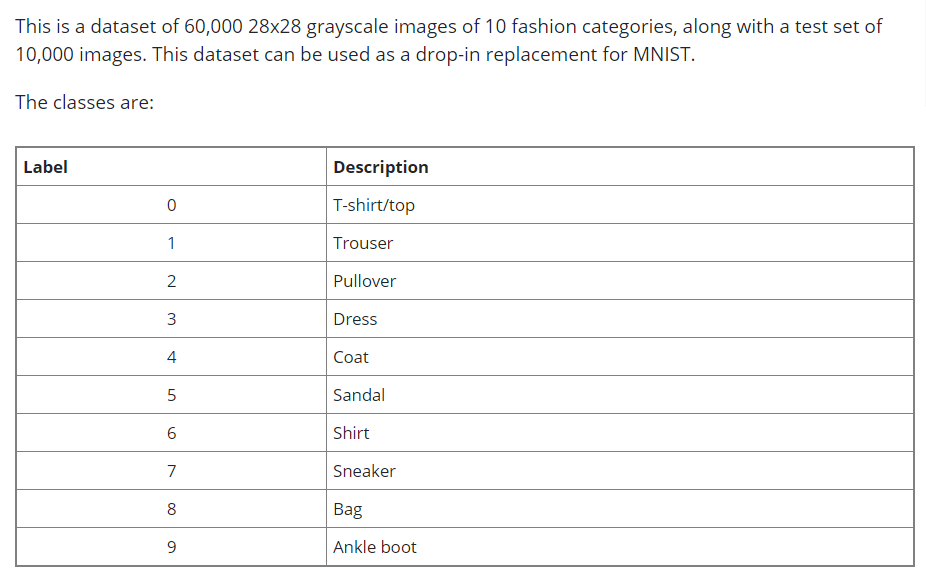

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape) 

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
# import random
# fig,ax = plt.subplots(2,2)
# plt.tight_layout()

# for i in range(2):
#   for j in range(2):
    
#     num = random.randint(0,60000)
#     img = X_train[num]
#     ax[i,j].set_title(class_names[y_train[num]])
    
#     ax[i,j].imshow(img);
    
  


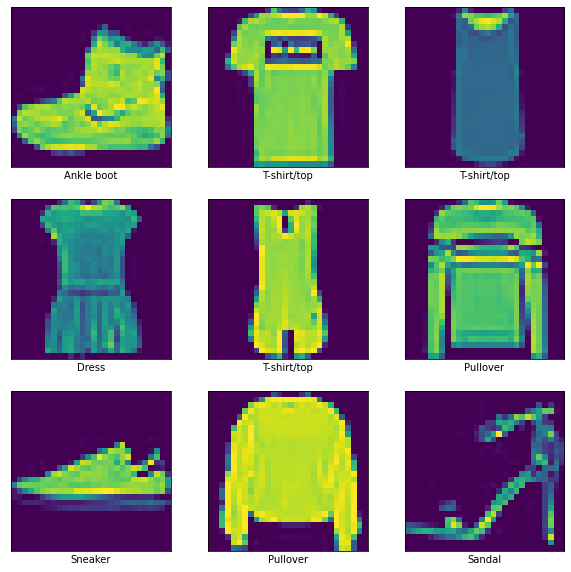

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Prepare the dataset for the model -> Adding Noise to the images

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
np.prod(X_train.shape[1:])

784

In [ ]:
(len(X_train), np.prod(X_train.shape[1:]))

(60000, 784)

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Build an Autoencoder model

In [ ]:
import tensorflow as tf #Importing Tensorflow Library
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

x = Dense(256, activation = 'relu')(encoded)
x = Dense(encoding_dim, activation = 'relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)

### Build the encoder part of the model

In [ ]:
encoder = tf.keras.Model(input_img, x)

## Build the decoder part of the model

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam())
autoencoder.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 784)               25872     
Total params: 52,048
Trainable params: 52,048
Non-trainable params: 0
_________________________________________________________________


##**Train the autoencoder for 20 epochs**

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test)
                )

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4137 - val_loss: 0.3445
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3267 - val_loss: 0.3175
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3106 - val_loss: 0.3088
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3045 - val_loss: 0.3047
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3010 - val_loss: 0.3017
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2987 - val_loss: 0.2999
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2970 - val_loss: 0.2985
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2954 - val_loss: 0.2968
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2940 - val_loss: 0.2956
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2929 - val_loss: 0.2944

# Evaluate trained model performance

In [ ]:
# encode and decode some digits
# note that we take them from the test set

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

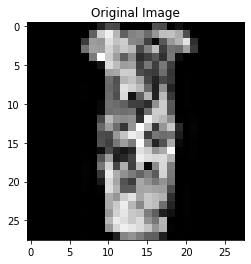

In [ ]:
plt.title('Original Image')
plt.imshow(X_test[100].reshape(28,28));


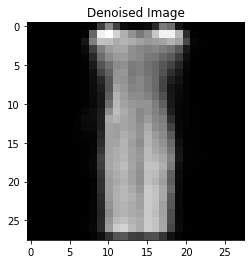

In [ ]:
plt.title('Denoised Image')
plt.imshow(decoded_imgs[100].reshape(28,28));

In [ ]:
encoded_imgs.shape, decoded_imgs.shape

((10000, 32), (10000, 784))

# Display the Denoised Images

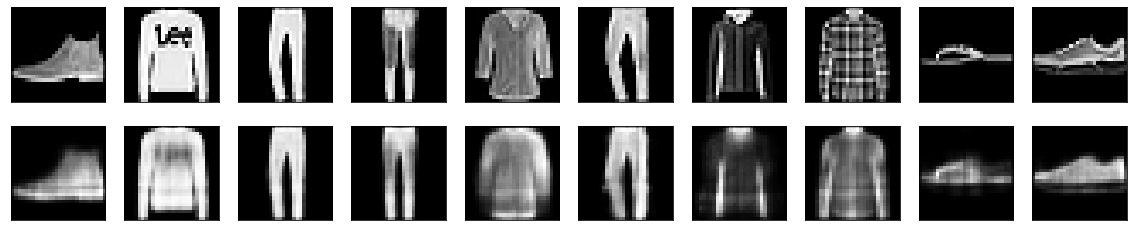

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Summary

Autoencoders are a type of unsupervised neural network that compresses the input data into a latent-space representation. Then it reconstructs the output from the latent space representation.
* The loss incurred while reconstructing from the latent space representation is called the reconstruction error

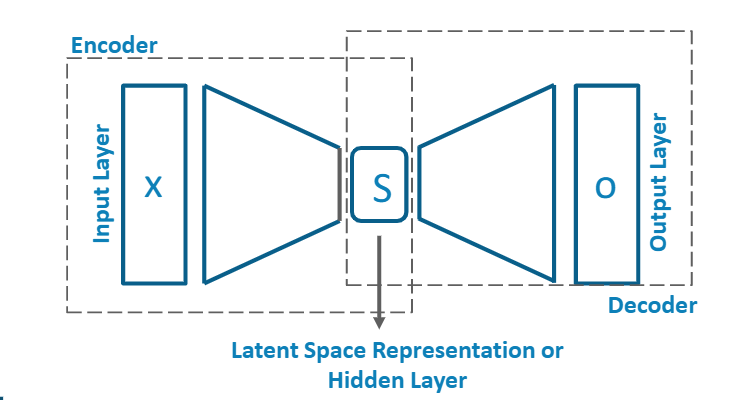

* Feature selection is one of the most important applications of AUtoencoders.
* Autoencoders encode the original data into a compressed latent space representation by combining the data's most important features.
* The compressed data is decoded to reconstruct the original image.
* The encoded feautures produced by the encoder are called the 'latent variables' 

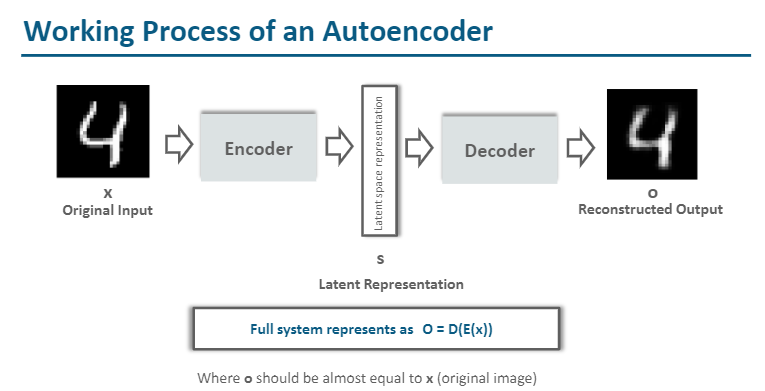

## Model description
* The model contains the encoder part and the decoder part.
* This model takes the image data as a flattenned 784 Dimensional vector -> Input(shape=(784,))
* The var encoding_dim decides the compression factor. Lower the values higher the compression. Much higher values produce an almost identical output image i.e. Not much compression has occured.

* The encoded layer takes in the input_img and it is passed to the decoded layer.
* The decoded layer has an activation of sigmoid as it is comparing the reconstruction loss.
* The autoencoder model is initialized and composes of input_img to decoded layers.
* Similarly the encoder model comprises of input_img to encoded layer.
* The reconstruction decoder model comprises of encoded_input which has a shape of the encoding_dim(i.e. the compressed shape of the latent space representation)
* The last layer of the autoencoder model is retreived to be used in decoder_layer
* decoder model is intialized from encoded_input to decoderlayer(encoded_input) to reconstruct the input.
* the model is compiled with binary_crossentropy loss and adam optimizer
* This is basically a denoising autoencoder
> The denoising autoencoder can be used to remove the noise from the images. 
> We can notice the output images are denoised after being reconstructed.


# More about autoencoders

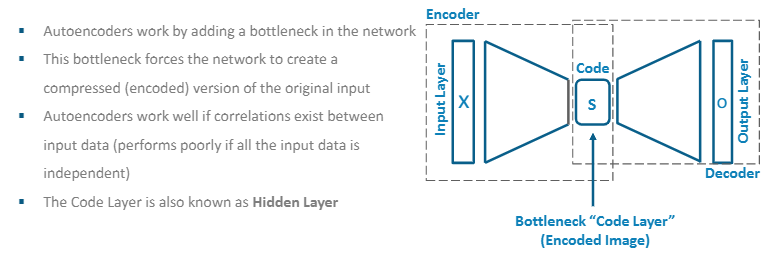